# SIT 720 - Machine Learning

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219056512

# Student name: Zhen Cai

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure (numerical): bp in mm/Hg
3.Specific Gravity (categorical): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin (categorical): al - (0,1,2,3,4,5)
5.Sugar (categorical): su - (0,1,2,3,4,5)
6.Red Blood Cells (categorial): rbc - (0, 1)
7.Pus Cell (categorical): pc - (0, 1)
8.Pus Cell clumps (categorical): pcc - (0, 1)
9.Bacteria (categorical): ba - (0, 1)
10.Blood Glucose Random (numerical): bgr in mgs/dl
11.Blood Urea (numerical): bu in mgs/dl
12.Serum Creatinine (numerical): sc in mgs/dl
13.Sodium (numerical): sod in mEq/L
14.Potassium (numerical): pot in mEq/L
15.Hemoglobin (numerical): hemo in gms
16.Packed Cell Volume (numerical)
17.White Blood Cell Count (numerical): wc in cells/cumm
18.Red Blood Cell Count (numerical): rc in millions/cmm
19.Hypertension (categorical): htn - (0, 1)
20.Diabetes Mellitus (categorical): dm - (0, 1)
21.Coronary Artery Disease (categorical): cad - (0, 1)
22.Appetite (categorical): appet - (0, 1)
23.Pedal Edema (categorical): pe - (0, 1)
24.Anemia (categorical): ane - (0, 1)
25.Class (categorical): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




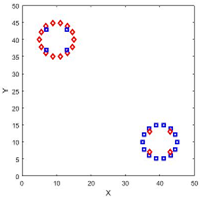


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

The accuracy is 1 - 8/28 = 71.4%. K = 14 or 18 will minimize the LOOCV.

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

Random forests could prevent overfitting and underfitting issues. The random forests is an ensemble learning method for classification that based on multitude of decision trees for training and provide the result of the mode of the classes. However by optimize the tuning parameter that govern the number of features based on cross-validation the over-fitting and under-fitting issues could be solved. 



## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

# Question A 

In [54]:
import numpy as np
import pandas as pd

from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read Data & Replace Missing Values

DataFrame = pd.read_csv('chronic_kidney_disease.csv')
#DataFrame.head()

X = DataFrame.iloc[:, 0:24]
Y =  DataFrame.loc[:, ['class']]
#X.head()
#Y.head()

# Mark Missing Values by NaN
X = X.replace("?", np.nan)

#Transfer Object to Float
X["age"] = X.age.astype(float)
X["bp"] = X.bp.astype(float)
X["sg"] = X.sg.astype(float)
X["al"] = X.al.astype(float)
X["su"] = X.rbc.astype(float)
X["bgr"] = X.bgr.astype(float)
X["bu"] = X.bu.astype(float)
X["sc"] = X.sc.astype(float)
X["sod"] = X.sod.astype(float)
X["pot"] = X.pot.astype(float)
X["hemo"] = X.hemo.astype(float)
#print(X.dtypes)

#Replace Missing Value with Mean Value
X = X.fillna(X.mean())
#print(X)

# Split Data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

# SVM Model

In [3]:
# SVM without Optimize

# Training Without Optimize

model = SVC() 
model.fit(Xtrain, np.ravel(Ytrain))
# print prediction results 
predictions = model.predict(Xtest) 
print(classification_report(Ytest, predictions)) 


              precision    recall  f1-score   support

         ckd       0.88      0.59      0.71        76
      notckd       0.55      0.86      0.67        44

    accuracy                           0.69       120
   macro avg       0.72      0.73      0.69       120
weighted avg       0.76      0.69      0.70       120



In [4]:
# SVM optimize

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(Xtrain, np.ravel(Ytrain)) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.607, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.982, total=  12.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[CV] ......... C=1, gamma=1, kernel=linear, score=0.964, total=  14.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=1.000, total= 1.4min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.893, total=  17.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.964, total=  33.8s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.946, total= 1.1min
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.964, total= 1.3min
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.964, total= 1.1min
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.911, total=  17.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.964, total=  47.9s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.946, total= 4.3min
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.964, total= 1.7min
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.946, total=  27.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.911, total=  17.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.804, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.786, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.964, total=  46.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.946, total= 5.3min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.964, total= 2.1min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.946, total=  33.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.911, total=  19.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.857, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.804, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 129.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [5]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [26]:
# Accuracy against the parameter value RBF

C_range = [0.1, 1, 10, 100, 1000]
Gamma_range = [1, 0.1, 0.01, 0.001, 0.0001]

test_accuracy_C = []
test_accuracy_Gamma = []
train_accuracy_C = []
train_accuracy_Gamma = []

for i in C_range:
    
    # creating classifier
    Model_1 = SVC(C=i, kernel='rbf')
    # fitting the model
    Model_1.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    test_accuracy_C.append(metrics.accuracy_score(Ytest, Model_1.predict(Xtest)))
    #recording the accuracy of the traininging set
    train_accuracy_C.append(metrics.accuracy_score(Ytrain, Model_1.predict(Xtrain)))


for g in Gamma_range:
    
    # creating classifier
    Model_2 = SVC(gamma=g, kernel='rbf')
    # fitting the model
    Model_2.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    test_accuracy_Gamma.append(metrics.accuracy_score(Ytest, Model_2.predict(Xtest)))
    #recording the accuracy of the traininging set
    train_accuracy_Gamma.append(metrics.accuracy_score(Ytrain, Model_2.predict(Xtrain)))
    

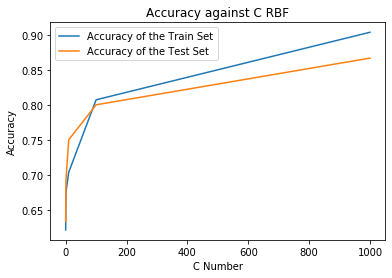

In [27]:
plt.title('Accuracy against C RBF')
plt.plot(C_range, train_accuracy_C, label='Accuracy of the Train Set')    
plt.plot(C_range, test_accuracy_C, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('C Number')
plt.legend()


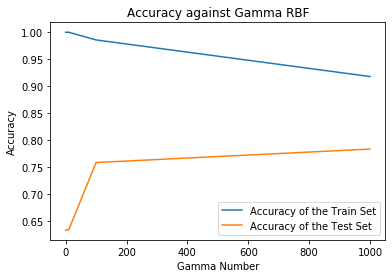

In [28]:
plt.title('Accuracy against Gamma RBF')
plt.plot(C_range, train_accuracy_Gamma, label='Accuracy of the Train Set')    
plt.plot(C_range, test_accuracy_Gamma, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Gamma Number')
plt.legend()


In [23]:
# Accuracy against the parameter value Linear

C_range = [0.1, 1, 10, 100, 1000]
Gamma_range = [1, 0.1, 0.01, 0.001, 0.0001]

test_accuracy_C = []
test_accuracy_Gamma = []
train_accuracy_C = []
train_accuracy_Gamma = []

for i in C_range:
    
    # creating classifier
    Model_3 = SVC(C=i, kernel='linear')
    # fitting the model
    Model_3.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    test_accuracy_C.append(metrics.accuracy_score(Ytest, Model_3.predict(Xtest)))
    #recording the accuracy of the traininging set
    train_accuracy_C.append(metrics.accuracy_score(Ytrain, Model_3.predict(Xtrain)))


for g in Gamma_range:
    
    # creating classifier
    Model_4 = SVC(gamma=g, kernel='linear')
    # fitting the model
    Model_4.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    test_accuracy_Gamma.append(metrics.accuracy_score(Ytest, Model_4.predict(Xtest)))
    #recording the accuracy of the traininging set
    train_accuracy_Gamma.append(metrics.accuracy_score(Ytrain, Model_4.predict(Xtrain)))

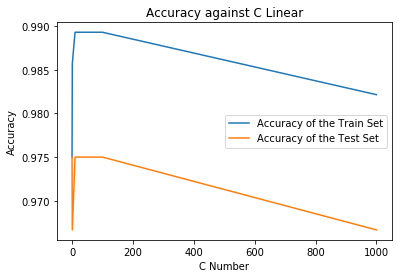

In [24]:
plt.title('Accuracy against C Linear')
plt.plot(C_range, train_accuracy_C, label='Accuracy of the Train Set')    
plt.plot(C_range, test_accuracy_C, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('C Number')
plt.legend()

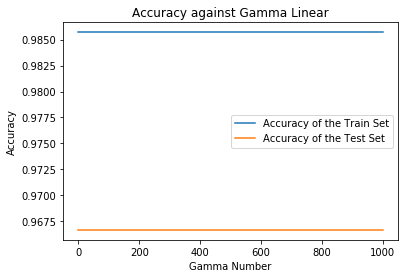

In [25]:
plt.title('Accuracy against Gamma Linear')
plt.plot(C_range, train_accuracy_Gamma, label='Accuracy of the Train Set')    
plt.plot(C_range, test_accuracy_Gamma, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Gamma Number')
plt.legend()


In [6]:
# Optimized SVM

grid_predictions = grid.predict(Xtest) 
  
# print classification report 
print(classification_report(Ytest, grid_predictions))

              precision    recall  f1-score   support

         ckd       0.99      0.97      0.98        76
      notckd       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# KNN

In [65]:
# KNN Model without Optimization

KNN = KNeighborsClassifier()
KNN = KNN.fit(Xtrain, np.ravel(Ytrain))

print(classification_report(Ytest, KNN.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       0.93      0.66      0.77        76
      notckd       0.61      0.91      0.73        44

    accuracy                           0.75       120
   macro avg       0.77      0.78      0.75       120
weighted avg       0.81      0.75      0.75       120



In [66]:
# KNN Optimization

# Creating a list all the parameter options 
params = {'n_neighbors': list(range(1,20)), 'weights': ['uniform', 'distance'],
         'leaf_size': list(range(2, 40))}

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_KNN = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3)
# Fitting the grid search
clf_KNN.fit(Xtrain, np.ravel(Ytrain))

# Viewing The Best Parameters
print('n_neighbors:', clf_KNN.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', clf_KNN.best_estimator_.get_params()['weights'])
print('Best leaf_size:', clf_KNN.best_estimator_.get_params()['leaf_size'])

Fitting 3 folds for each of 1444 candidates, totalling 4332 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


n_neighbors: 1
Best weights: uniform
Best leaf_size: 2


[Parallel(n_jobs=1)]: Done 4332 out of 4332 | elapsed:   30.5s finished


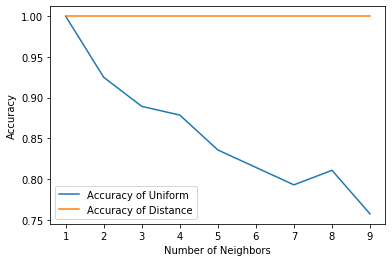

In [67]:
# Accuracy against Parameters

# Number of Neighbours

train_accuracy_n_uniform = []
train_accuracy_n_distance = []
n_neighbors = range(1,10)

for n in n_neighbors:
    
    # creating the KNN classifier
    clf_uni = KNeighborsClassifier(n_neighbors = n, weights = "uniform")
    clf_dis = KNeighborsClassifier(n_neighbors = n, weights = "distance")
    # fitting the model
    clf_uni.fit(Xtrain, np.ravel(Ytrain))
    clf_dis.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the training set
    train_accuracy_n_uniform.append(metrics.accuracy_score(Ytrain, clf_uni.predict(Xtrain)))
    train_accuracy_n_distance.append(metrics.accuracy_score(Ytrain, clf_dis.predict(Xtrain)))

plt.plot(n_neighbors, train_accuracy_n_uniform, label='Accuracy of Uniform')    
plt.plot(n_neighbors, train_accuracy_n_distance, label='Accuracy of Distance')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

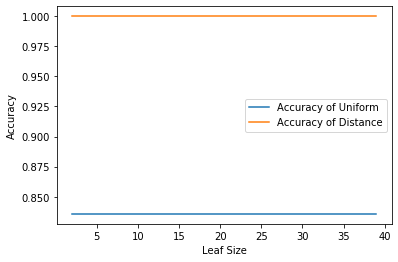

In [69]:
# Number of Neighbours

train_accuracy_leaf_size_uniform = []
train_accuracy_leaf_size_distance = []
leaf_size = range(2,40)

for n in leaf_size:
    
    # creating the KNN classifier
    clf_uni = KNeighborsClassifier(leaf_size = n, weights = "uniform")
    clf_dis = KNeighborsClassifier(leaf_size = n, weights = "distance")
    # fitting the model
    clf_uni.fit(Xtrain, np.ravel(Ytrain))
    clf_dis.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the training set
    train_accuracy_leaf_size_uniform.append(metrics.accuracy_score(Ytrain, clf_uni.predict(Xtrain)))
    train_accuracy_leaf_size_distance.append(metrics.accuracy_score(Ytrain, clf_dis.predict(Xtrain)))

plt.plot(leaf_size, train_accuracy_leaf_size_uniform, label='Accuracy of Uniform')    
plt.plot(leaf_size, train_accuracy_leaf_size_distance, label='Accuracy of Distance')
plt.ylabel('Accuracy')
plt.xlabel('Leaf Size')
plt.legend()

In [71]:
# KNN after Optimization

clf = KNeighborsClassifier(n_neighbors = 1, weights = "uniform", leaf_size = 2)

clf.fit(Xtrain, np.ravel(Ytrain))

print(classification_report(Ytest, clf.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       0.88      0.76      0.82        76
      notckd       0.67      0.82      0.73        44

    accuracy                           0.78       120
   macro avg       0.77      0.79      0.78       120
weighted avg       0.80      0.78      0.79       120



# Decision Tree

In [30]:
# Decision Tree Without Ooptimization

DT = tree.DecisionTreeClassifier()
DT = DT.fit(Xtrain, Ytrain)

print(classification_report(Ytest, DT.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        76
      notckd       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [59]:
# Decision Optimization

# Creating Parameter Space

# Creating a list all the parameter options 
params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1,20)),
         'max_leaf_nodes': list(range(2, 20))}

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(tree.DecisionTreeClassifier(), params, verbose=1, cv=3)
# Fitting the grid search
clf_GS.fit(Xtrain, Ytrain)

# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Max_leaf_nodes:', clf_GS.best_estimator_.get_params()['max_leaf_nodes'])

Fitting 3 folds for each of 684 candidates, totalling 2052 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Criterion: gini
Best max_depth: 2
Max_leaf_nodes: 3


[Parallel(n_jobs=1)]: Done 2052 out of 2052 | elapsed:   10.3s finished


In [46]:
# Decision Tree after Optimization

clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2,
                                  max_leaf_nodes = 3, min_samples_split = 2)

clf.fit(Xtrain, Ytrain)

print(classification_report(Ytest, clf.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        76
      notckd       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



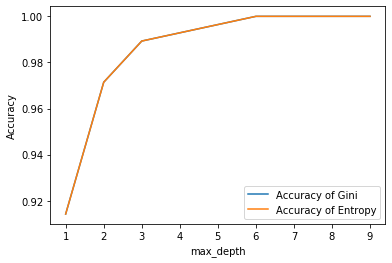

In [77]:
# Accuracy against Parameters

# Max_depth

test_accuracy_max_depth_gini = []
test_accuracy_max_depth_entropy = []
max_depth_range = range(1,10)

for i in max_depth_range:
    
    # creating classifier
    DT_Gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
    DT_Entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    # fitting the model
    DT_Gini.fit(Xtrain, np.ravel(Ytrain))
    DT_Entropy.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    test_accuracy_max_depth_gini.append(metrics.accuracy_score(Ytrain, DT_Gini.predict(Xtrain)))
    test_accuracy_max_depth_entropy.append(metrics.accuracy_score(Ytrain, DT_Entropy.predict(Xtrain)))
    
plt.plot(max_depth_range, test_accuracy_max_depth_gini, label='Accuracy of Gini')    
plt.plot(max_depth_range, test_accuracy_max_depth_entropy, label='Accuracy of Entropy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend() 

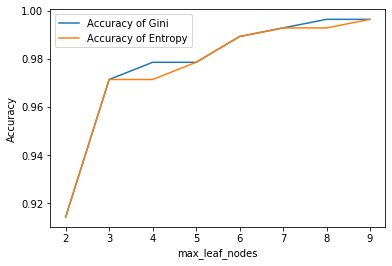

In [75]:
# max_leaf_nodes

train_accuracy_max_leaf_gini = []
train_accuracy_max_leaf_entropy = []
max_leaf_nodes = range(2,10)

for i in max_leaf_nodes:
    
    # creating classifier
    DT_Gini = tree.DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = i)
    DT_Entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i)
    # fitting the model
    DT_Gini.fit(Xtrain, np.ravel(Ytrain))
    DT_Entropy.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    train_accuracy_max_leaf_gini.append(metrics.accuracy_score(Ytrain, DT_Gini.predict(Xtrain)))
    train_accuracy_max_leaf_entropy.append(metrics.accuracy_score(Ytrain, DT_Entropy.predict(Xtrain)))


plt.plot(max_leaf_nodes, train_accuracy_max_leaf_gini, label='Accuracy of Gini')    
plt.plot(max_leaf_nodes, train_accuracy_max_leaf_entropy, label='Accuracy of Entropy')
plt.ylabel('Accuracy')
plt.xlabel('max_leaf_nodes')
plt.legend() 

# Random Forest

In [56]:
# Random Forest Without Ooptimization

RF = RandomForestClassifier()
RF = RF.fit(Xtrain, np.ravel(Ytrain))

print(classification_report(Ytest, RF.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        76
      notckd       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [58]:
# Creating Parameter Space

# Creating a list all the parameter options 
params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1,20)),
         'max_leaf_nodes': list(range(2, 20))}

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_RF = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=3)
# Fitting the grid search
clf_RF.fit(Xtrain, np.ravel(Ytrain))

# Viewing The Best Parameters
print('Best Criterion:', clf_RF.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_RF.best_estimator_.get_params()['max_depth'])
print('Max_leaf_nodes:', clf_RF.best_estimator_.get_params()['max_leaf_nodes'])

Fitting 3 folds for each of 684 candidates, totalling 2052 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Criterion: gini
Best max_depth: 11
Max_leaf_nodes: 7


[Parallel(n_jobs=1)]: Done 2052 out of 2052 | elapsed:  7.5min finished


In [60]:
# Random Forest after Optimization

clf = RandomForestClassifier(criterion = "gini", max_depth = 11,
                                  max_leaf_nodes = 7)

clf.fit(Xtrain, np.ravel(Ytrain))

print(classification_report(Ytest, clf.predict(Xtest)))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        76
      notckd       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



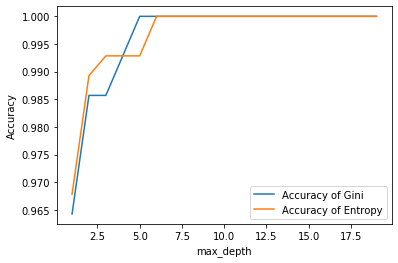

In [74]:
# Accuracy against Parameters

# Max_depth

train_accuracy_max_depth_gini = []
train_accuracy_max_depth_entropy = []
max_depth_range = range(1,20)

for i in max_depth_range:
    
    # creating classifier
    RF_Gini = RandomForestClassifier(criterion = "gini", max_depth = i)
    RF_Entropy = RandomForestClassifier(criterion = "entropy", max_depth = i)
    # fitting the model
    RF_Gini.fit(Xtrain, np.ravel(Ytrain))
    RF_Entropy.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    train_accuracy_max_depth_gini.append(metrics.accuracy_score(Ytrain, RF_Gini.predict(Xtrain)))
    train_accuracy_max_depth_entropy.append(metrics.accuracy_score(Ytrain, RF_Entropy.predict(Xtrain)))
    
plt.plot(max_depth_range, train_accuracy_max_depth_gini, label='Accuracy of Gini')    
plt.plot(max_depth_range, train_accuracy_max_depth_entropy, label='Accuracy of Entropy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend() 

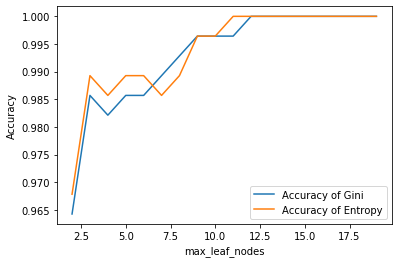

In [73]:
# max_leaf_nodes

train_accuracy_max_leaf_gini = []
train_accuracy_max_leaf_entropy = []
max_leaf_nodes = range(2,20)

for i in max_leaf_nodes:
    
    # creating classifier
    RF_Gini = RandomForestClassifier(criterion = "gini", max_leaf_nodes = i)
    RF_Entropy = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = i)
    # fitting the model
    RF_Gini.fit(Xtrain, np.ravel(Ytrain))
    RF_Entropy.fit(Xtrain, np.ravel(Ytrain))
    #recording the accuracy of the testing set
    train_accuracy_max_leaf_gini.append(metrics.accuracy_score(Ytrain, RF_Gini.predict(Xtrain)))
    train_accuracy_max_leaf_entropy.append(metrics.accuracy_score(Ytrain, RF_Entropy.predict(Xtrain)))


plt.plot(max_leaf_nodes, train_accuracy_max_leaf_gini, label='Accuracy of Gini')    
plt.plot(max_leaf_nodes, train_accuracy_max_leaf_entropy, label='Accuracy of Entropy')
plt.ylabel('Accuracy')
plt.xlabel('max_leaf_nodes')
plt.legend() 

## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**

Random Forest shows the best performance which is 100%. The random forests is an ensemble learning method for classification that based on multitude of decision trees for training and provide the result of the mode of the classes which will results in the best performance. However 100% accuracy would have potential overfitting problems. 

In order to improve the model performance. I would suggest that increase the range and amount of each parameter and add more paremeters into the model. 